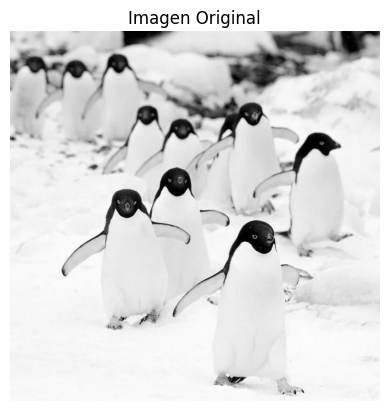

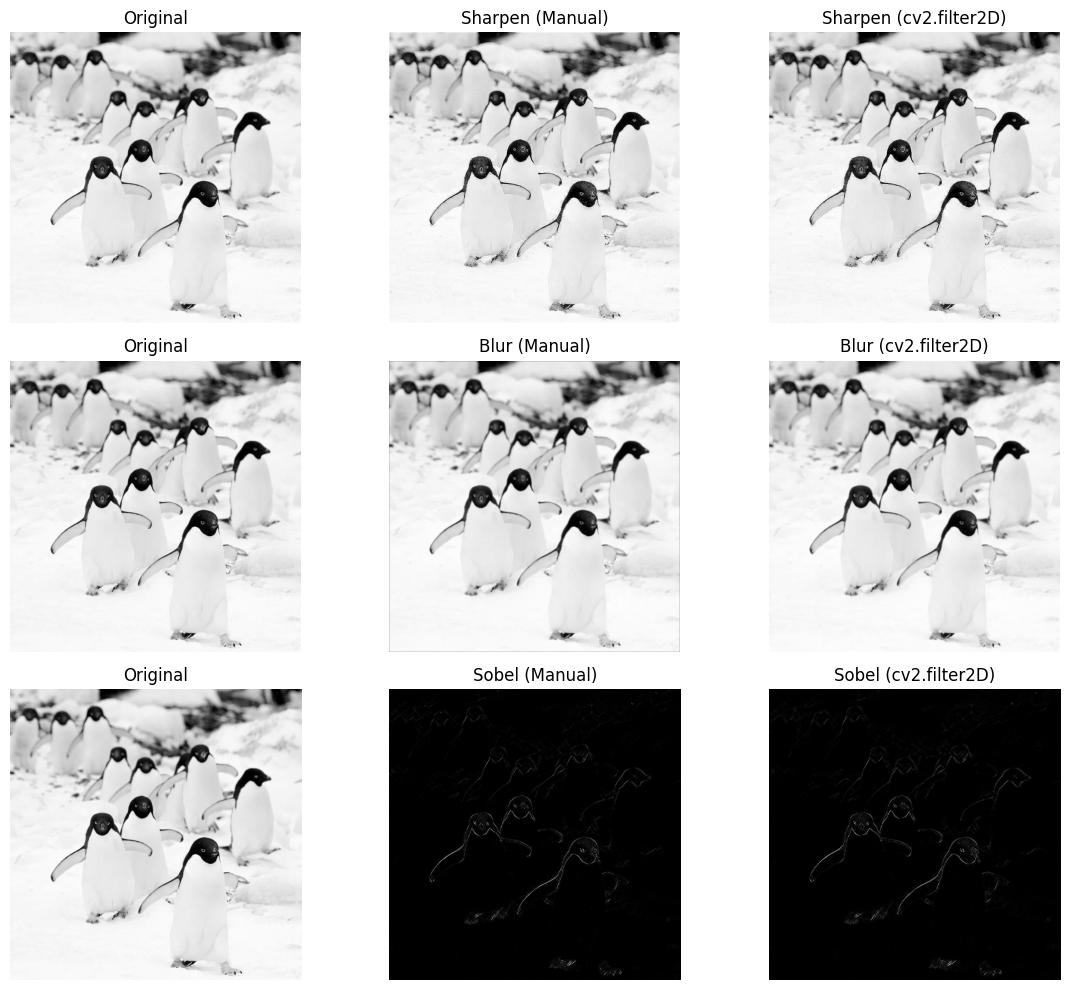

✅ GIF guardado como 'comparacion_filtros.gif' con loop infinito


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Cargar imagen en escala de grises
img_gray = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar imagen original
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

# Función de convolución manual
def aplicar_convolucion(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Rellenar bordes
    img_padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    resultado = np.zeros_like(img)

    # Aplicar convolución
    for i in range(h):
        for j in range(w):
            region = img_padded[i:i+kh, j:j+kw]
            resultado[i, j] = np.clip(np.sum(region * kernel), 0, 255)

    return resultado.astype(np.uint8)

# Definir kernels
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

kernel_blur = (1/9) * np.ones((3, 3))

kernel_sobel_esquinas = np.array([[1, 0, -1],
                                  [0, 0, 0],
                                  [-1, 0, 1]])  # Sobel X (simplificado para ejemplo)

# Aplicar filtros personalizados
img_sharpen = aplicar_convolucion(img_gray, kernel_sharpen)
img_blur = aplicar_convolucion(img_gray, kernel_blur)
img_sobel = aplicar_convolucion(img_gray, kernel_sobel_esquinas)

# Aplicar filtros con OpenCV
img_sharpen_cv = cv2.filter2D(img_gray, -1, kernel_sharpen)
img_blur_cv = cv2.filter2D(img_gray, -1, kernel_blur)
img_sobel_cv = cv2.filter2D(img_gray, -1, kernel_sobel_esquinas)

# Mostrar resultados comparativos
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

nombres = ['Sharpen', 'Blur', 'Sobel']
imgs_custom = [img_sharpen, img_blur, img_sobel]
imgs_cv = [img_sharpen_cv, img_blur_cv, img_sobel_cv]

for i in range(3):
    axs[i, 0].imshow(img_gray, cmap='gray')
    axs[i, 0].set_title('Original')
    axs[i, 1].imshow(imgs_custom[i], cmap='gray')
    axs[i, 1].set_title(f'{nombres[i]} (Manual)')
    axs[i, 2].imshow(imgs_cv[i], cmap='gray')
    axs[i, 2].set_title(f'{nombres[i]} (cv2.filter2D)')

for ax in axs.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

# Crear GIF animado
frames = []

# Agregar original
frames.append(img_gray)

# Agregar personalizados
frames += imgs_custom

# Agregar OpenCV
frames += imgs_cv

# Guardar GIF (loop infinito)
imageio.mimsave('comparacion_filtros.gif', frames, duration=1500, loop=0)

print("✅ GIF guardado como 'comparacion_filtros.gif' con loop infinito")
